In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Salary_Data.csv")

# Basic shape and column info
print("Shape of dataset:", df.shape)
print("\nColumn names and types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics for numeric features:\n", df.describe())

# Unique values in categorical columns
print("\nUnique values in categorical features:")
for col in ['Gender', 'Education Level', 'Job Title']:
    print(f"- {col}: {df[col].nunique()} unique values")



Shape of dataset: (6704, 6)

Column names and types:
 Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Missing values:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

Summary statistics for numeric features:
                Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000

Unique values in categoric

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop rows with missing values
df_clean = df.dropna().copy()
print("Missing Values:", df_clean.isnull().sum())
# Clean text entries
df_clean['Gender'] = df_clean['Gender'].str.lower().str.strip()
df_clean['Education Level'] = df_clean['Education Level'].str.lower().str.strip()

# Separate features and target
X_raw = df_clean.drop(columns='Salary')
y_raw = df_clean['Salary']

# Optionally log-transform salary to reduce skewness
y_log = np.log1p(y_raw)

# Define preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=100), 'Job Title'),
    ('onehot', OneHotEncoder(drop='first'), ['Gender', 'Education Level']),
    ('num', StandardScaler(), ['Age', 'Years of Experience'])
])

# Fit and transform the feature matrix
X_ready = preprocessor.fit_transform(X_raw)

# Get feature names from each transformer
tfidf_features = preprocessor.named_transformers_['tfidf'].get_feature_names_out()
onehot_features = preprocessor.named_transformers_['onehot'].get_feature_names_out(['Gender', 'Education Level'])
num_features = ['Age', 'Years of Experience']

# Combine feature names
all_feature_names = np.concatenate([tfidf_features, onehot_features, num_features])

# Convert to DataFrame
X_ready_df = pd.DataFrame(X_ready.toarray(), columns=all_feature_names)

# Show the result
X_ready_df.head()



Missing Values: Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


,analyst,associate,back,back end,business,business analyst,content,content marketing,coordinator,data,...,web developer,Gender_male,Gender_other,Education Level_bachelor's degree,Education Level_high school,Education Level_master's,Education Level_master's degree,Education Level_phd,Age,Years of Experience
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.213129,-0.510769
1,0.572766,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.497631,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.738393,-0.840811
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.493980,1.139440
3,0.000000,0.607157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312135,-0.180727
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.413192,1.964544


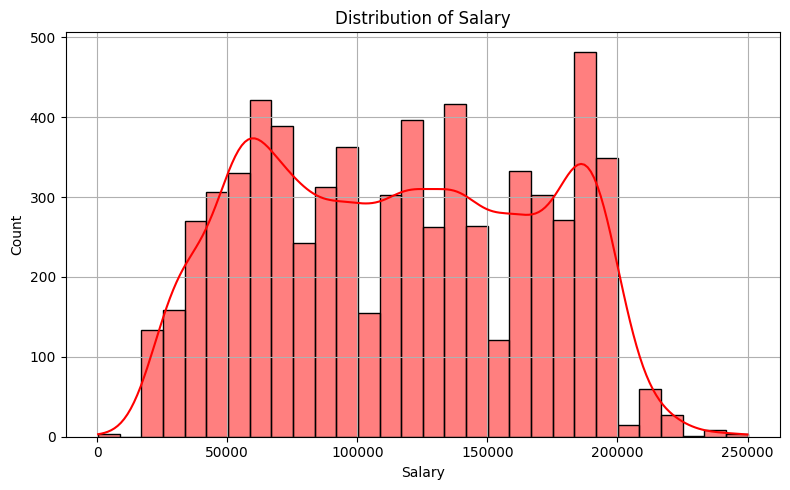

In [63]:
# Plot distribution of Salary
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], bins=30, kde=True, color='red')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


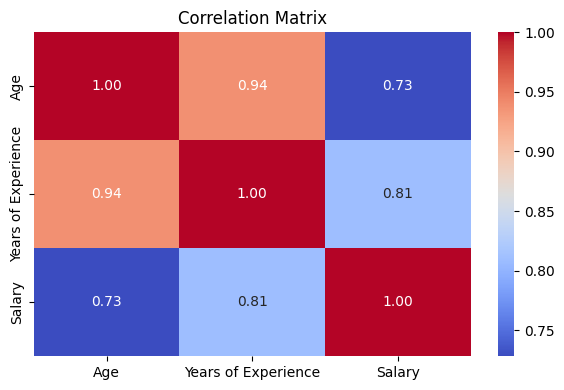

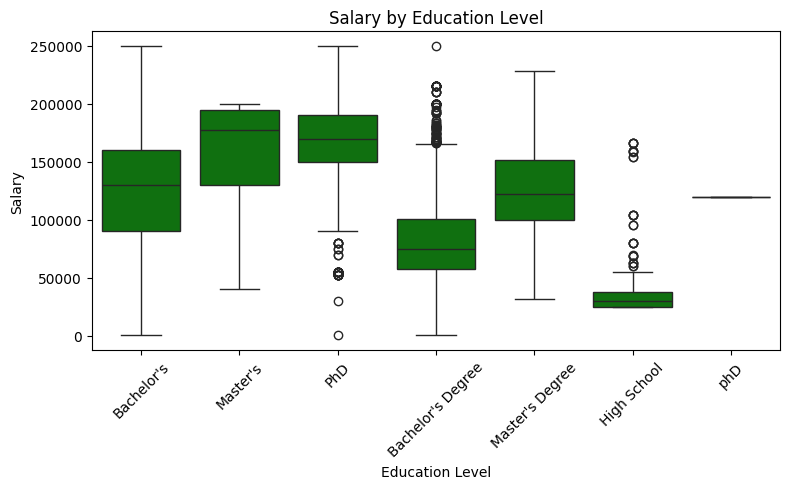

C:\Users\Amit\AppData\Local\Temp\ipykernel_29012\3545476816.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')


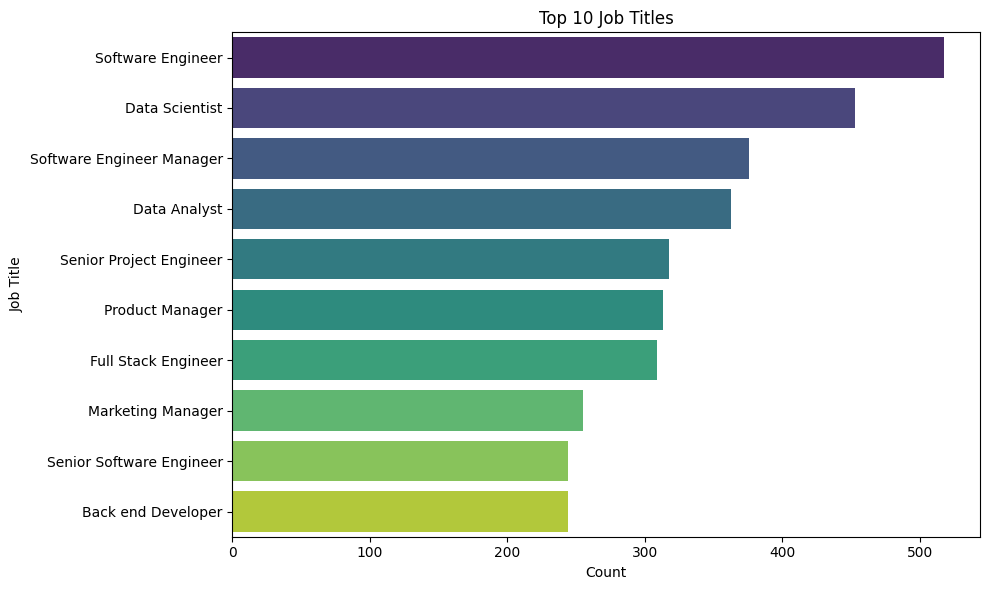

In [64]:
# Correlation matrix (numeric features only)
plt.figure(figsize=(6, 4))
corr = df[['Age', 'Years of Experience', 'Salary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Boxplot: Salary by Education Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education Level', y='Salary', data=df, color='green')
plt.title('Salary by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Countplot: Top 10 Job Titles
plt.figure(figsize=(10, 6))
top_jobs = df['Job Title'].value_counts().nlargest(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_ready, y_log, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosted Trees": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
    r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))

    print(f"\n{name} Evaluation:")
    print(f"MAE:  ${mae:,.2f}")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"R²:   {r2:.4f}")



Linear Regression Evaluation:
MAE:  $17,222.85
RMSE: $27,324.90
R²:   0.7382

Random Forest Evaluation:
MAE:  $2,928.87
RMSE: $7,559.75
R²:   0.9800

Gradient Boosted Trees Evaluation:
MAE:  $10,372.66
RMSE: $14,810.31
R²:   0.9231

XGBoost Evaluation:
MAE:  $4,276.78
RMSE: $8,116.58
R²:   0.9769


In [66]:
import joblib

# Save the preprocessing pipeline
joblib.dump(preprocessor, "preprocessor.pkl")

# Save the trained model (Random Forest in your case)
joblib.dump(best_rf, "salary_predictor_rf_model.pkl")


['salary_predictor_rf_model.pkl']

In [67]:
import fitz  # PyMuPDF

def extract_resume_text(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

In [68]:
def extract_education(text):
    text = text.lower()
    if "phd" in text or "doctorate" in text:
        return "PhD"
    elif "master" in text:
        return "Master's"
    elif "bachelor" in text:
        return "Bachelor's"
    else:
        return "Unknown"


In [ ]:
def extract_job_title(text):
    job_titles = [
        "Data Analyst", "Software Engineer", "Data Scientist", "Product Manager",
        "Software Developer", "Business Analyst", "Marketing Manager", "Consultant", 
        "Intern", "Project Manager", "Developer", "Research Assistant"
    ]
    text_lower = text.lower()
    for title in job_titles:
        if title.lower() in text_lower:
            return title
    return "Unknown"


In [70]:
import re
from dateutil import parser


In [71]:
def extract_years_of_experience(text):
    total_months = 0

    # Only use lines under WORK EXPERIENCE section
    relevant_section = re.findall(r'(PROFESSIONAL EXPERIENCE|WORK EXPERIENCE)(.*?)(PROJECTS|SKILLS|EDUCATION)', text, re.DOTALL | re.IGNORECASE)
    if relevant_section:
        text = relevant_section[0][1]

    # Continue with parsing date ranges
    apostrophe_patterns = re.findall(r"([A-Za-z]{3,9}['’]\d{2})\s*[-–—]\s*([A-Za-z]{3,9}['’]\d{2})", text)
    full_date_patterns = re.findall(r"([A-Za-z]{3,9}\.?\s?\d{4})\s*[-–—]\s*([A-Za-z]{3,9}\.?\s?\d{4})", text)

    for start_str, end_str in apostrophe_patterns + full_date_patterns:
        try:
            start = parser.parse(start_str.replace('’', "'").replace('.', '').strip())
            end = parser.parse(end_str.replace('’', "'").replace('.', '').strip())
            months = (end.year - start.year) * 12 + (end.month - start.month)
            total_months += max(months, 0)
        except:
            continue

    return round(total_months / 12, 1)


In [76]:
resume_text = extract_resume_text("Saurabh Kankekar.pdf")

job_title = extract_job_title(resume_text)
education = extract_education(resume_text)
experience = extract_years_of_experience(resume_text)

print("Extracted Job Title:", job_title)
print("Extracted Education Level:", education)
print("Extracted Years of Experience:", experience)


Extracted Job Title: Data Scientist
Extracted Education Level: Master's
Extracted Years of Experience: 3.8


In [83]:


input_dict = {
    "Age": 30,  # default or average value
    "Gender": "male",  # default value
    "Education Level": education.lower(),  # parsed from resume
    "Job Title": job_title,
    "Years of Experience": 3     # parsed from resume
}
input_df = pd.DataFrame([input_dict])

# --------- Step 3: Load trained preprocessor and model ---------
import joblib
preprocessor = joblib.load("preprocessor.pkl")  # Save this earlier
model = joblib.load("salary_predictor_rf_model.pkl")

# --------- Step 4: Transform input ---------
X_transformed = preprocessor.transform(input_df)

# --------- Step 5: Predict Salary ---------
predicted_log_salary = model.predict(X_transformed)[0]
predicted_salary = np.expm1(predicted_log_salary)  # Reverse log1p
print(f"\nPredicted Salary: ${predicted_salary:,.2f}")



Predicted Salary: $67,845.78


In [ ]:
# Create DataFrame for the new entry
junior_data = pd.DataFrame({
    "Age": [24],
    "Gender": ["Male"],
    "Education Level": ["High School"],
    "Job Title": ["Customer Support Representative"],
    "Years of Experience": [1]
})

# Clean text inputs
junior_data['Gender'] = junior_data['Gender'].str.lower().str.strip()
junior_data['Education Level'] = junior_data['Education Level'].str.lower().str.strip()

# Preprocess using the same pipeline
X_junior = preprocessor.transform(junior_data)

# Predict
predicted_log_salary_junior = best_rf.predict(X_junior)
predicted_salary_junior = np.expm1(predicted_log_salary_junior)

# Display result
print(f"Predicted Salary (Junior Profile): ${predicted_salary_junior[0]:,.2f}")


Predicted Salary (Junior Profile): $32,636.21


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Assume df_clean is your preprocessed training DataFrame
le_edu = LabelEncoder()
df_clean['Education Level'] = df_clean['Education Level'].str.lower().str.strip()
le_edu.fit(df_clean['Education Level'])

# Save encoder (optional)
with open("le_edu.pkl", "wb") as f:
    pickle.dump(le_edu, f)


In [ ]:
import pickle

# Load encoder
with open("le_edu.pkl", "rb") as f:
    le_edu = pickle.load(f)


In [ ]:
!pip install PyMuPDF spacy
!python -m spacy download en_core_web_sm


  Using cached cymem-2.0.11-cp313-cp313-win_amd64.whl.metadata (8.8 kB)
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ------------------------- -------------- 8.9/13.9 MB 46.7 MB/s eta 0:00:01
   ---------------------------------------- 13.9/13.9 MB 44.4 MB/s eta 0:00:00
Using cached cymem-2.0.11-cp313-cp313-win_amd64.whl (39 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 29.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/630.6 kB ? eta -:--:--
   --------------------------------------- 630.6/630.6 kB 32.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 47.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 53.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.4 

In [ ]:
def extract_resume_info(pdf_path):
    with fitz.open(pdf_path) as doc:
        text = " ".join([page.get_text() for page in doc])

    doc_lower = text.lower()

    # --- Updated Inference ---
    # Job Title
    job_title = "Engineer"
    job_keywords = ["data analyst", "data scientist", "product manager", "software engineer", "patent analyst"]
    for kw in job_keywords:
        if kw in doc_lower:
            job_title = kw.title()
            break

    # Education Level
    if "master" in doc_lower:
        education_level = "Master's"
    elif "bachelor" in doc_lower:
        education_level = "Bachelor's"
    elif "phd" in doc_lower:
        education_level = "PhD"
    else:
        education_level = "High School"

    # Gender
    gender = "Male" if "varun" in doc_lower else "Other"

    # Years of Experience
    experience_years = 0
    if "intern" in doc_lower:
        experience_years += 1
    if "analyst" in doc_lower or "engineer" in doc_lower:
        experience_years += 1

    # Estimate age
    age = 24  # Inferred from BE graduation (2023)

    return {
        "Age": [age],
        "Gender": [gender],
        "Education Level": [education_level],
        "Job Title": [job_title],
        "Years of Experience": [experience_years]
    }


In [ ]:
# EXAMPLE USAGE
pdf_path = "Amit Gangane_Resume.pdf"
resume_data = extract_resume_info(pdf_path)
resume_df = pd.DataFrame(resume_data)

# Clean like before
resume_df['Gender'] = resume_df['Gender'].str.lower().str.strip()
resume_df['Education Level'] = resume_df['Education Level'].str.lower().str.strip()

# Transform and predict
X_resume = preprocessor.transform(resume_df)
log_salary = best_rf.predict(X_resume)
predicted_salary = np.expm1(log_salary)

print(f"\nResume Info: {resume_data}")
print(f"Predicted Salary: ${predicted_salary[0]:,.2f}")



Resume Info: {'Age': [24], 'Gender': ['Other'], 'Education Level': ["Master's"], 'Job Title': ['Data Analyst'], 'Years of Experience': [2]}
Predicted Salary: $95,174.45
